In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from validation_metric import total_validation

from datetime import datetime

start = datetime.now()

#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_num_imputed_clean_modelling.csv")

# fill NaN:
df = df.fillna(df.mean())

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def depth_opit(liste):
    """
    Erwartet eine Liste und iteriert über sie. Die Listeneinträge sind 
    die Baumtiefe in einem Random Forest.
    Nutzt total_validation um einen DF zu generieren und das Verhalten 
    der Fehlermaße entlang der Liste durch einen Plot beobachtbar zu 
    machen. 
    """
    all_metrics = pd.DataFrame()

    for act_depth in liste:
        regr = RandomForestRegressor(max_depth = act_depth, random_state=42)
        regr.fit(X_train, y_train)

        # predict values:
        y_pred = regr.predict(X_test)

        # validate
        df_RandomForestReg_validation = total_validation(y_test, y_pred)
        
        # append depth-counter
        df_RandomForestReg_validation.columns = [act_depth] 
        
        # append metrics to all_metrics
        all_metrics = pd.concat([all_metrics,df_RandomForestReg_validation], axis=1)
        
    return(all_metrics)

liste = range(20,30)
df_metrics = depth_opit(liste)


stop = datetime.now()
print(str(stop - start)) #just4fun

0:16:49.624129


In [25]:
df_metrics_t = df_metrics.transpose()
df_metrics_t

,MAE,MAPE (%),MSE,RMSE (Units),r-squared (%)
20,18.46,30.53,889.05,29.82,51.32
21,18.18,30.35,880.83,29.68,51.77
22,17.90,30.06,867.17,29.45,52.52
23,17.64,29.62,857.35,29.28,53.06
24,17.43,29.71,841.91,29.02,53.90
25,17.21,29.39,832.36,28.85,54.43
26,17.04,29.43,839.28,28.97,54.05
27,16.87,29.16,824.85,28.72,54.84
28,16.74,28.81,819.17,28.62,55.15
29,16.59,28.93,814.98,28.55,55.38


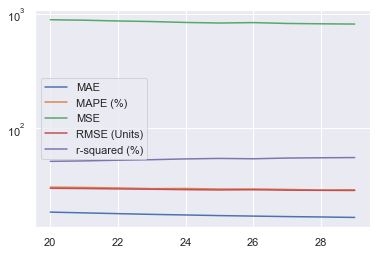

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_ = plt.plot(df_metrics_t)
_ = plt.yscale('log')
_ = plt.legend(labels = df_metrics_t.columns, loc = 'center left')

**Fazit**: Okay, viel besser als bei 20 wirds nicht. Nehme ich. 